# Credits & Inspiration
[Comprehensive data exploration with Python by Pedro Marcelino](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook#'SalePrice',-her-buddies-and-her-interests) - In-depth EDA on this dataset

[Handling Missing Values](https://www.kaggle.com/dansbecker/handling-missing-values) - In-depth missing values handling

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)
import os
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import skew, norm
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
PROJECT_ROOT_DIR = '/content/drive/Othercomputers/XPS15_Perso/Alternance/Formation/P8'
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "Data")

df_train = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
df_test = pd.read_csv(os.path.join(DATA_PATH, "test.csv"))

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)

Shape of df_train: (1460, 81)
Shape of df_test: (1459, 80)


Each row in the dataset describes the characteristics of a house.
*   Our goal is to predict the SalePrice, given these features.
*   Our models are evaluated on the RMSE between the log of the SalePrice predicted by our model, and the log of the actual SalePrice (converting RMSE errors to a log scale ensures that errors in predicting expensive houses and cheap houses will affect our score equally).

# Data exploration of the most important variables

## 'SalePrice'

'SalePrice' is the reason of our quest (this competition is about predicting the final price of each home).

Let's see a quick descriptive statistics/histogram summary:

In [ ]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew Dist: 1.8828757597682129
Kurtosis Dist: 6.536281860064529


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


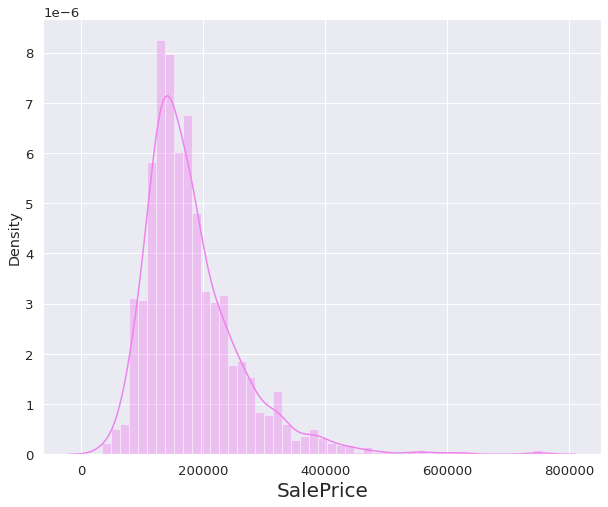

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.distplot(df_train['SalePrice'], color='violet')
plt.xlabel('SalePrice', fontsize=20)
print('Skew Dist:', df_train['SalePrice'].skew())
print('Kurtosis Dist:', df_train['SalePrice'].kurt())

Great, It seems that the minimum price is larger than zero, maning we won't have to deal with houses sold for zero or negative prices.
Also, we can see on the histogram that the distribution does not deviate from a normal distribution. This was expected as few people can afford very expensive houses. Let's deal with this distribution now.

House prices are tend to relevant with it's age and location.
Let's check the average 'YearBuilt' and 'MSZoning'.

In [ ]:
grouped = df_train['YearBuilt'].groupby(df_train['MSZoning'])
print(grouped.mean())

MSZoning
C (all)    1924.100000
FV         2004.507692
RH         1945.687500
RL         1975.461338
RM         1943.256881
Name: YearBuilt, dtype: float64


The mean YearBuilt of this dataset is 1924. 

One thing is very interesting to note on the dates of construction of the houses according to the categories of MSZoning. Clearly, the FV (Floating Village Residential) category has the most recent average build year of all MSZoning categories. 

In [ ]:
grouped = df_train['SalePrice'].groupby(df_train['MSZoning'])
print(grouped.mean())

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64


Now, we focus on the average sale price of a house according to its category in the MSZoning variable.
It would seem that we observe the same ranking as the previous comparison. Thus, the FV category would sell on average for more than $200k. 

We can hypothetically think that the selling price of a house depends on its year of construction. Let's look at it in more detail:

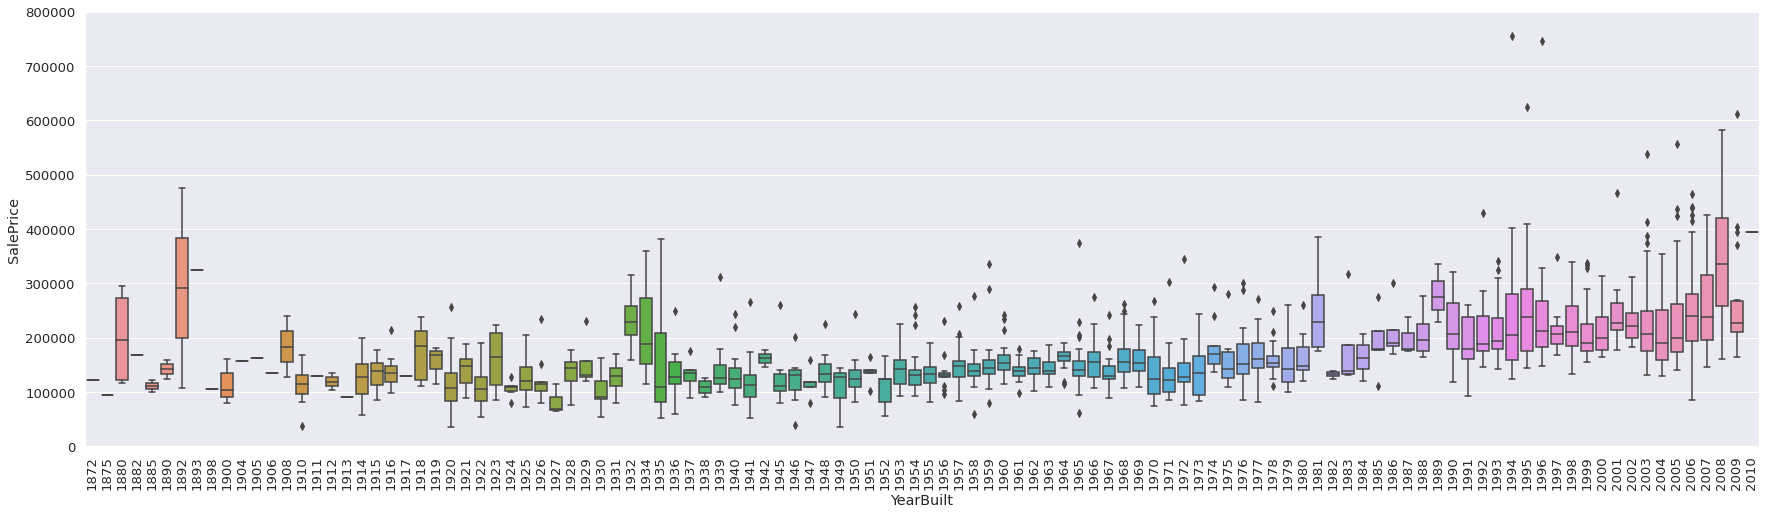

In [ ]:
f, ax = plt.subplots(figsize=(30, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=df_train)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Although it's not a strong tendency, seems that 'SalePrice' is more prone to spend more money in recent houses than in old ones.

### 'SalePrice' correlation matrix

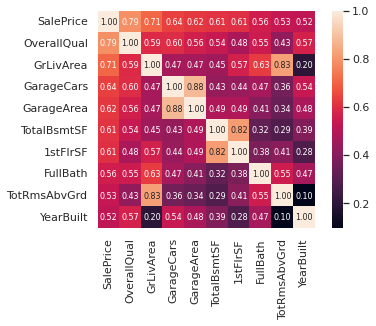

In [ ]:
#saleprice correlation matrix
corrmat = df_train.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to the Saleprice correlation matrix, these 10 variables are the most correlated with 'SalePrice'. Thoughts on this:

*   'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 
'SalePrice'.
*   'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, the number of cars that fit into the garage is a consequence of the garage area. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is slightly higher).
*   'TotalBsmtSF' and '1stFloor' also seem to be twins. Let's keep here 'TotalBsmtSF'.
*   'FullBath': hard to think the 'SalePrice' can partially be defined by this variable.
*   'TotRmsAbvGrd' and 'GrLivArea', twins again. Keeping 'GrLivArea' cause of the higher correlation with 'SalePrice'.
*   It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. 

### Scatter plots between 'SalePrice' and correlated variables

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


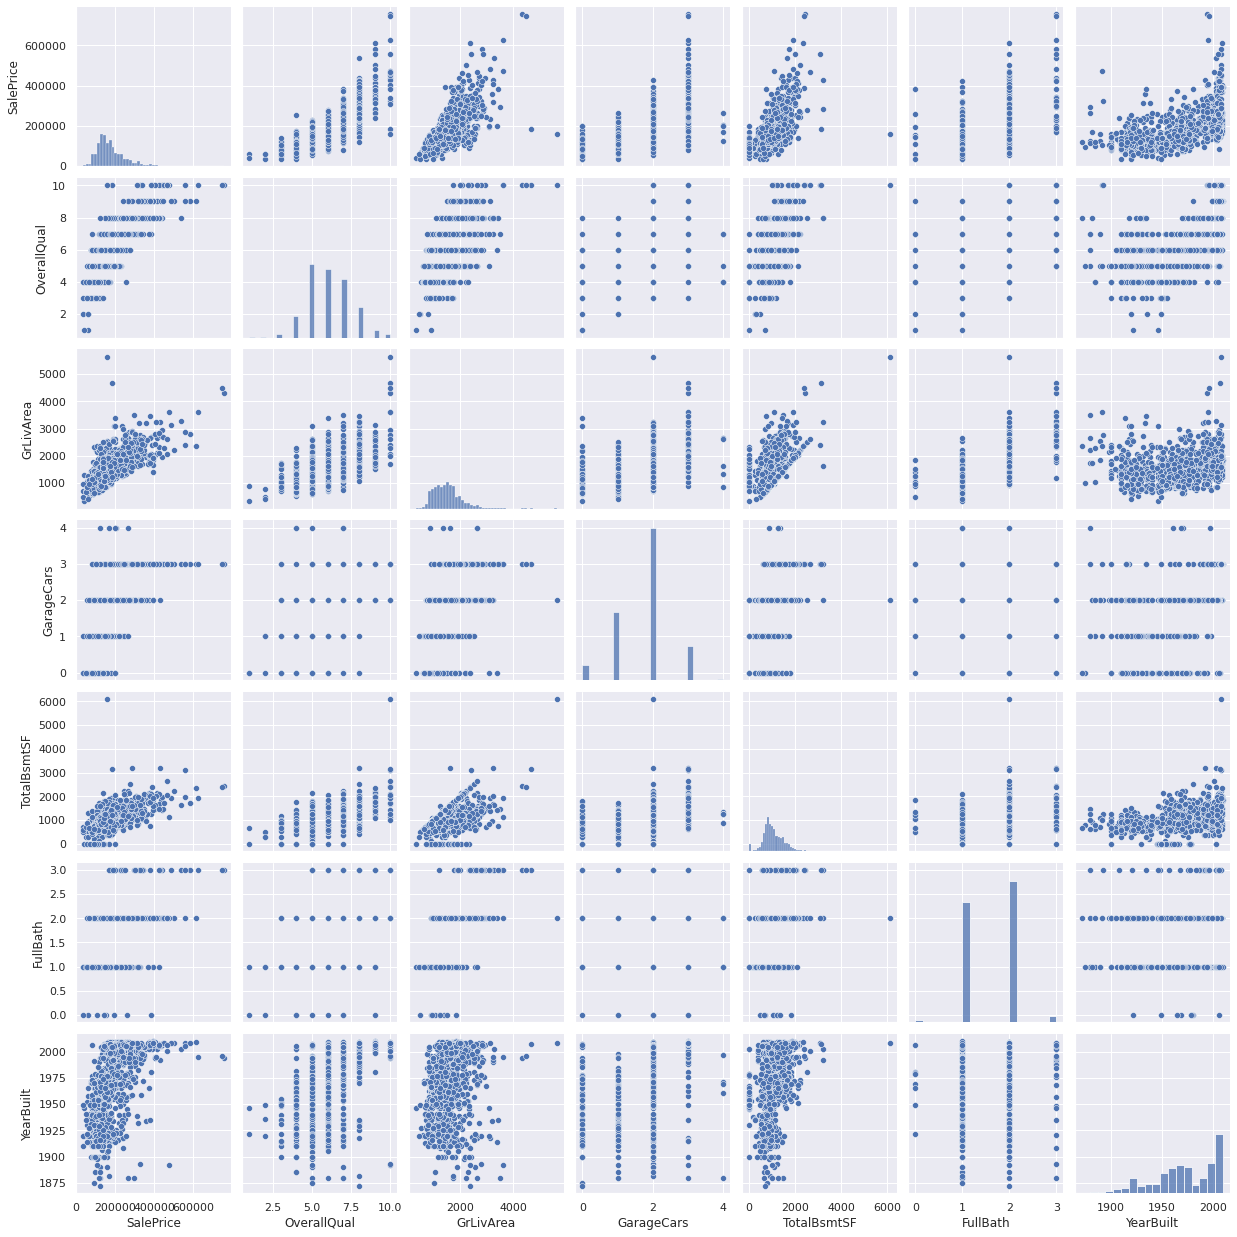

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

The figure 'TotalBsmtSF'/'GrLiveArea' is very interesting. In this figure, the dots are drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).


Let's move forward to what's missing: missing data!


### Missing Data

In [ ]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


The [missing data handling](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python?scriptVersionId=19403046&cellId=42) (part 4.) discribed by [Pedro Marcelino](https://www.kaggle.com/pmarcelino) on his notebook is a very simple and complete explanation of how we can manage missing data on this dataset. In this study, I'll do as his description.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [ ]:
def fill_NaN(df):
  df['Functional'] = df['Functional'].fillna('Typ')
  df["PoolQC"] = df["PoolQC"].fillna("None")
  df['MiscFeature'] = df['MiscFeature'].fillna("None")
  df["Alley"] = df["Alley"].fillna("None")
  df['Fence'] = df['Fence'].fillna("None")
  df['FireplaceQu'] = df['FireplaceQu'].fillna("None")
  df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
  for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
      df[col] = df[col].fillna('None')
  for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
      df[col] = df[col].fillna('None')
  df['Electrical'] = df['Electrical'].fillna("SBrkr")
  df['MSZoning'] = df['MSZoning'].fillna("None")
  df['Utilities'] = df['Utilities'].fillna("None")
  df['KitchenQual'] = df['KitchenQual'].fillna("TA")
  df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
  df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
  df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
  for col in ('GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
  for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea','BsmtUnfSF', 'TotalBsmtSF'):
    df[col] = df[col].fillna(0)
  return df

In [ ]:
#dealing with missing data
df_train = fill_NaN(df_train)
df_test = fill_NaN(df_test)

In [ ]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(2)

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479


In [ ]:
# Removing the useless variables
useless = ['GarageYrBlt', 'MasVnrType'] 
df_train.drop(useless, axis=1, inplace=True)
df_test.drop(useless, axis=1, inplace=True)

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [ ]:
print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)

Shape of df_train: (1460, 79)
Shape of df_test: (1459, 78)


### Feature engeneering

#### Transforming some numerical variables that are really categorical

In [ ]:
def num2cat(df):
  #MSSubClass=The building class
  df['MSSubClass'] = df['MSSubClass'].apply(str)

  #Changing Overall* into a categorical variable
  df['OverallCond'] = df['OverallCond'].astype(str)
  df['OverallQual'] = df['OverallQual'].apply(str)

  #Year and month sold are transformed into categorical features.
  df['YrSold'] = df['YrSold'].astype(str)
  df['MoSold'] = df['MoSold'].astype(str)

  return df

In [ ]:
df_train = num2cat(df_train)
df_test = num2cat(df_test)

#### Adding one more important feature

In [ ]:
def total_sqfootage(df):
  df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
  return df

In [ ]:
df_train = total_sqfootage(df_train)
df_test = total_sqfootage(df_test)

### Target

In [ ]:
target = df_train["SalePrice"]
df_train.drop(["SalePrice"], axis=1, inplace=True)

In [ ]:
target = np.log1p(target)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'SalePrice')

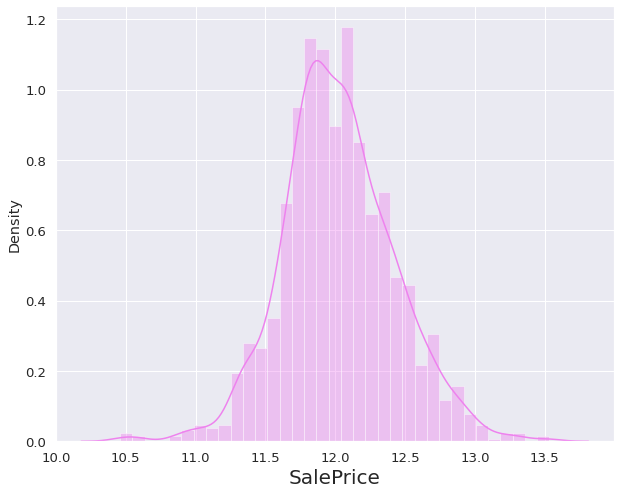

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.distplot(target, color='violet')
plt.xlabel('SalePrice', fontsize=20)

Great, we now have a gaussian distribution.


### Data pipeline to transform numerical and categorical data

In [ ]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown = 'ignore')),
    ])

In [ ]:
num_attribs = [col for col in df_train.columns if (df_train[col].dtype == 'int64' or df_train[col].dtype == 'float64') and (col !='Id')]
cat_attribs = [col for col in df_train.columns if (df_train[col].dtype == 'object')]

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)]
    )

In [ ]:
df_train_piped = full_pipeline.fit_transform(df_train)
df_test_piped = full_pipeline.transform(df_test)

In [ ]:
print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)

Shape of df_train: (1460, 79)
Shape of df_test: (1459, 79)


## Baseline

In [ ]:
dm_reg = DummyRegressor()

dm_reg.fit(df_train_piped, target)
predictions = np.exp(dm_reg.predict(df_test))

output = pd.DataFrame({'Id': df_test.Id, 'SalePrice': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


#Modeling

In [ ]:
pip install catboost

     |████████████████████████████████| 76.1 MB 99 kB/s 


In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

### Define a cross validation strategy

We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation

In [ ]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train_piped)
    rmse = np.sqrt(-cross_val_score(model, df_train_piped, target, scoring="neg_mean_squared_error", cv=kf))
    return(rmse)

In [ ]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, df_train_piped, target, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

### LASSO Regression :
This model may be very sensitive to outliers. So we need to make it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

### Elastic Net Regression :
again made robust to outliers

In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

### Kernel Ridge Regression :

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

### Gradient Boosting Regression :
With huber loss that makes it robust to outliers

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

### XGBoost :

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

### LightGBM :

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

### Cat Boost Regressor

In [ ]:
catb = CatBoostRegressor(silent=True)

### Random Forest Regressor

In [ ]:
rfr = RandomForestRegressor()

### Support Vector Regression


In [ ]:
svr = SVR()

### Decision Tree Regressor

In [ ]:
dtr = DecisionTreeRegressor()

## Base models scores
Let's see how these base models perform on the data by evaluating the cross-validation rmsle error

In [ ]:
score = rmsle_cv(KRR)
print("KernelRidge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("GradientBoostingRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("XGBRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBMRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(catb)
print("CatBoostRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(rfr)
print("RandomForestRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(svr)
print("SVR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

score = rmsle_cv(dtr)
print("DecisionTreeRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

KernelRidge score: 0.1238 (0.0223)

GradientBoostingRegressor score: 0.1246 (0.0207)

XGBRegressor score: 0.1227 (0.0155)

LGBMRegressor score: 0.1233 (0.0182)

CatBoostRegressor score: 0.1191 (0.0176)

RandomForestRegressor score: 0.1436 (0.0184)

SVR score: 0.1426 (0.0223)

DecisionTreeRegressor score: 0.2023 (0.0194)



In [ ]:
params = {'iterations': [500],
          'depth': [4, 5, 6],
#          'loss_function': ['Logloss', 'CrossEntropy'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
#           'eval_metric': ['Accuracy'],
#           'use_best_model': ['True'],
          'random_seed': [42]
         }

grid = GridSearchCV(estimator=catb, param_grid=params, cv=5, n_jobs=-1)
grid.fit(df_train_piped, target)    


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f6fe878ca90>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6], 'iterations': [500],
                         'l2_leaf_reg': array([1.00000000e-20, 3.16227766e-20, 1.00000000e-19]),
                         'leaf_estimation_iterations': [10],
                         'random_seed': [42]})

In [ ]:
score = rmsle_cv(grid)
print("DecisionTreeRegressor score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

DecisionTreeRegressor score: 0.1211 (0.0153)



### Stacking models

### Simplest Stacking approach : Averaging base models
We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

#### Averaged base models class

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

#### Averaged base models score

We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models in the mix.

In [ ]:
averaged_models = AveragingModels(models = (catb, model_xgb, model_lgb, KRR))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1182 (0.0181)



Wow ! It seems even the simplest stacking approach really improve the score . This encourages us to go further and explore a less simple stacking approch.

In [ ]:
averaged_models.fit(df_train_piped, target)
predictions = np.exp(averaged_models.predict(df_test_piped))

In [ ]:
output = pd.DataFrame({'Id': df_test.Id, 'SalePrice': predictions})
output.to_csv('my_submission_averagedModels.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
